## Cluster Analysis

This script imports the filtered data, runs tSNE reduction to 2D and cluster visualisations

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
# Read in filtered data
file_path = 'data/agg_data.csv'
df = pd.read_csv(file_path)
df.shape

(1918, 35)

In [3]:
df.columns

Index(['period', 'sex', 'period_intensity', 'pain_level', 'backaches',
       'bodyaches', 'stomach_cramps', 'joint_pains', 'tender_breasts',
       'overall_pain', 'headache', 'indigestion', 'bloating', 'constipation',
       'diarrhea', 'nausea', 'vomiting', 'appetite_loss', 'cravings_salty',
       'cravings_sweet', 'skin_changes', 'acne', 'tiredness', 'dizziness',
       'pins_and_needles', 'temperature', 'fever', 'hot_flashes',
       'short_of_breath', 'coughing', 'insomnia', 'work_affected', 'weight',
       'sleep', 'log_steps'],
      dtype='object')

In [11]:
print("Null values:", df.isnull().values.any())

Null values: False


In [13]:
# Create a t-SNE instance and reduce the dimensionality to 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_embedded = tsne.fit_transform(df)

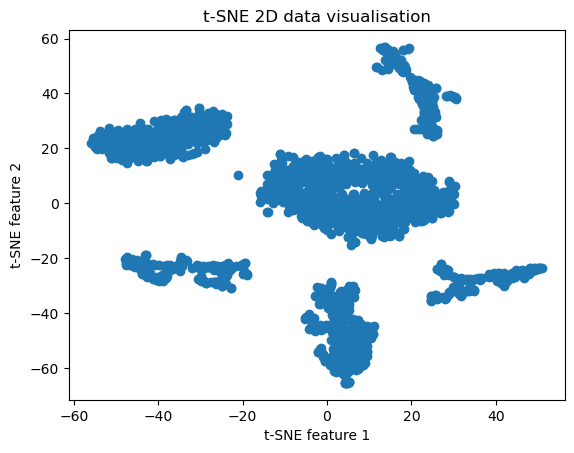

In [14]:
# Plot the 2D representation - filtered data
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE 2D data visualisation')
plt.savefig('fig/tSNE_2D_data.png', dpi=300)  
plt.show()

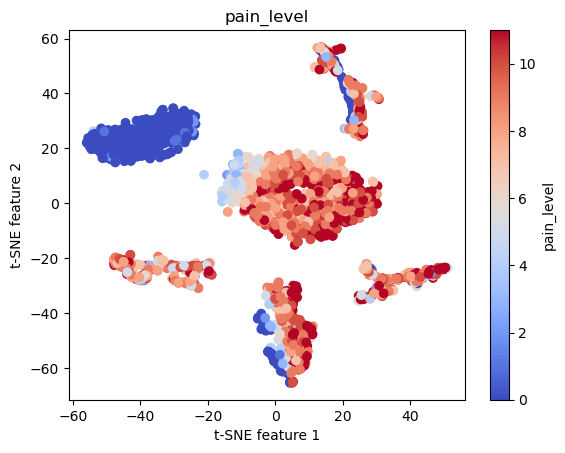

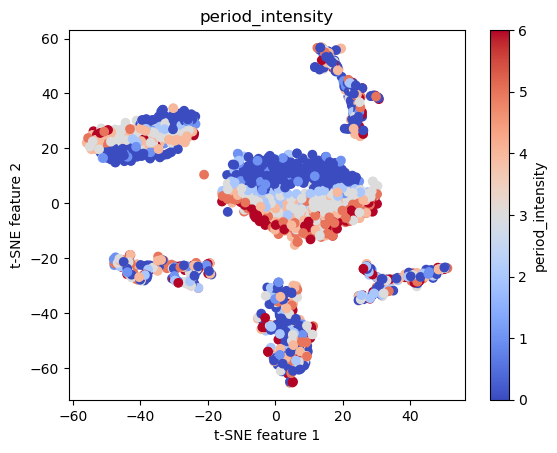

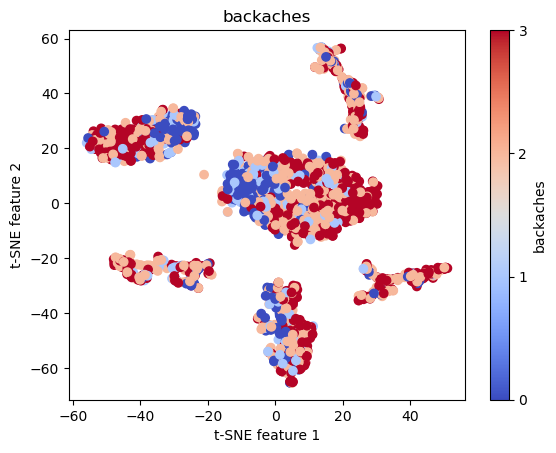

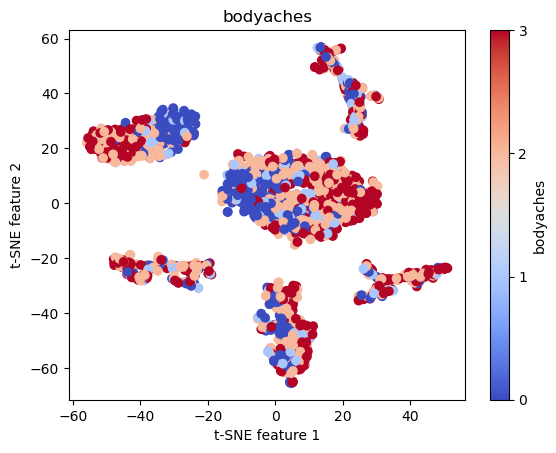

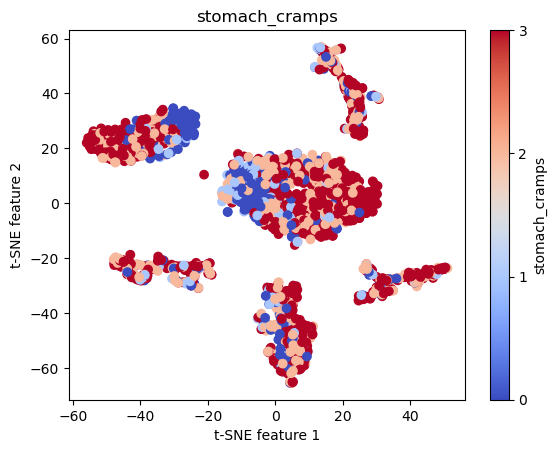

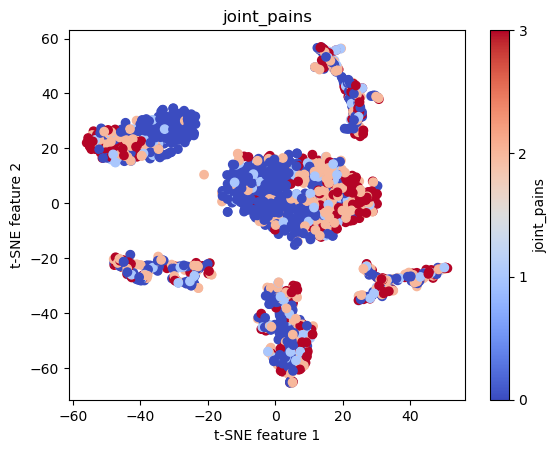

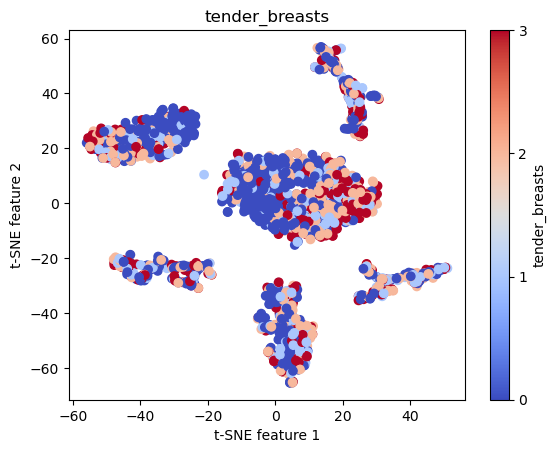

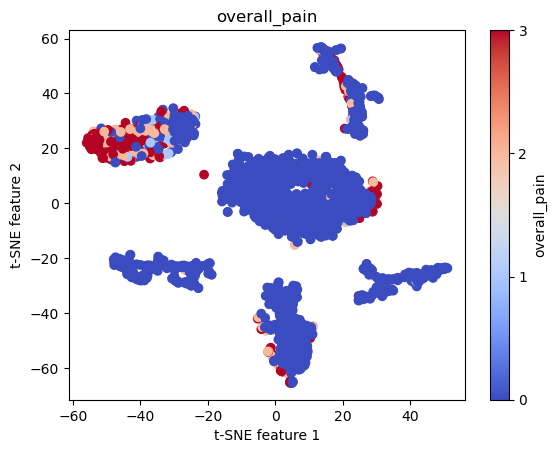

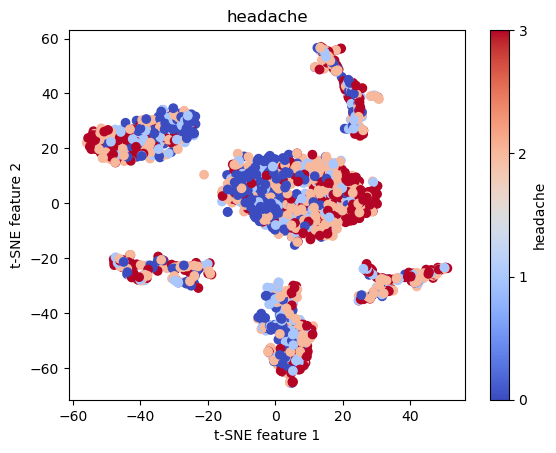

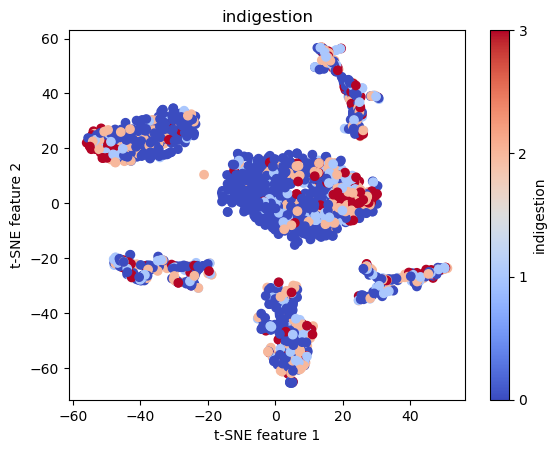

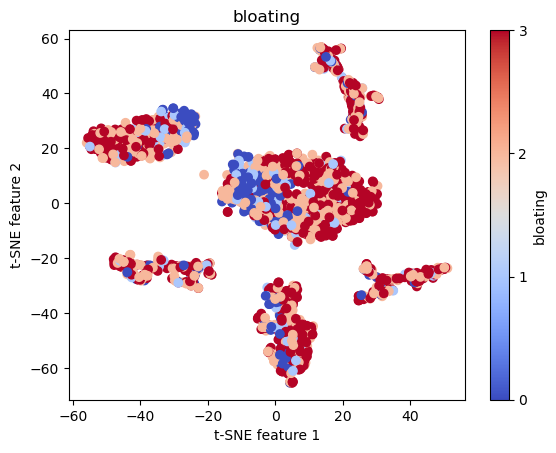

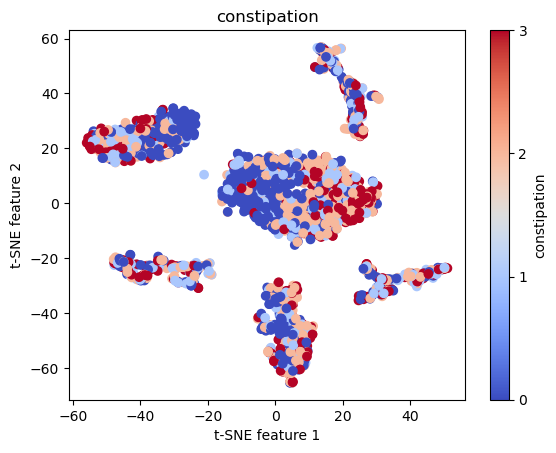

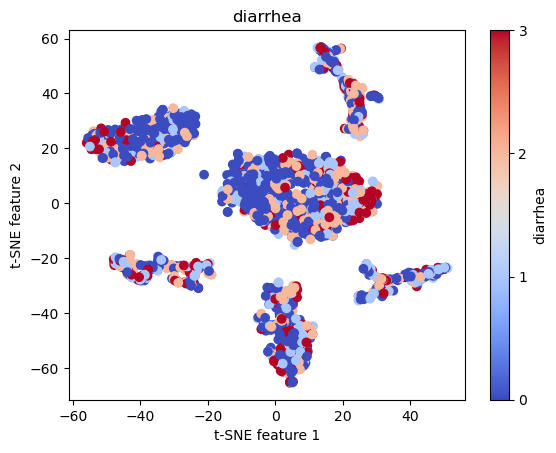

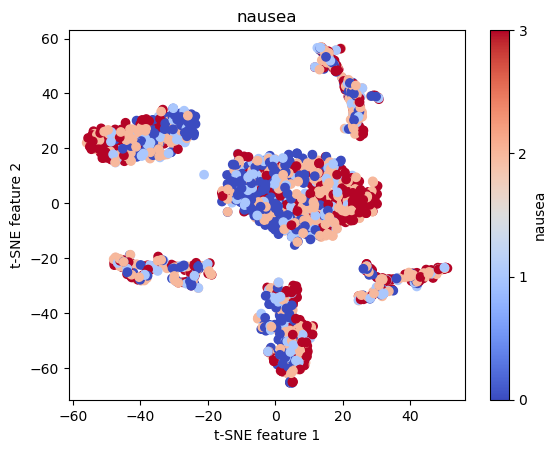

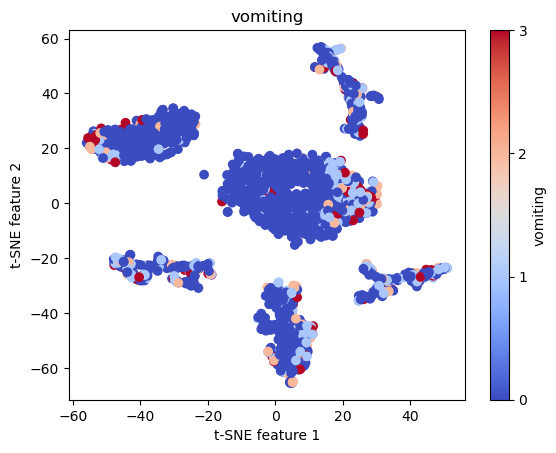

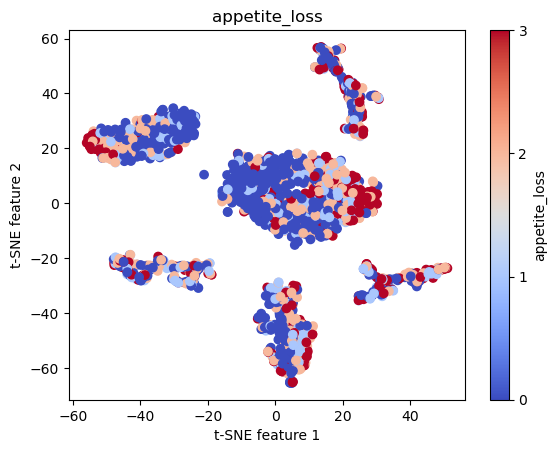

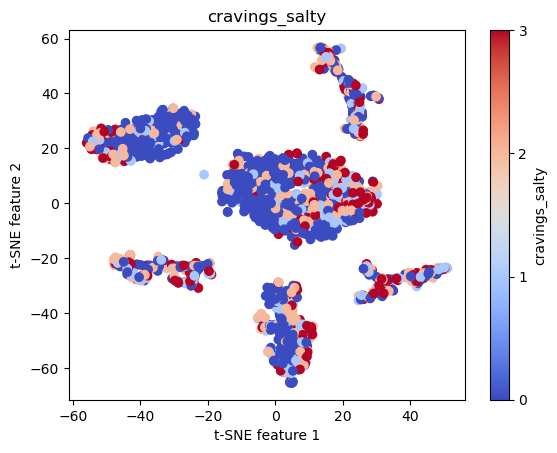

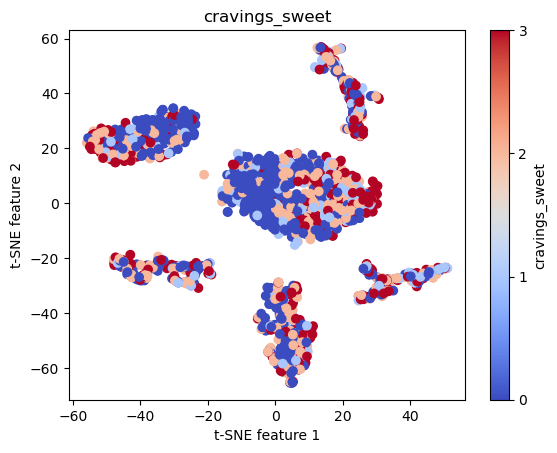

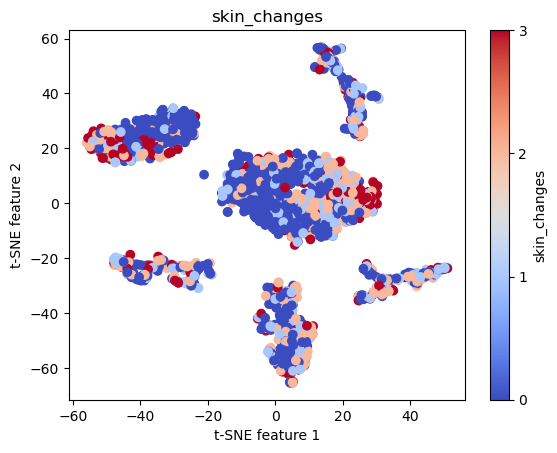

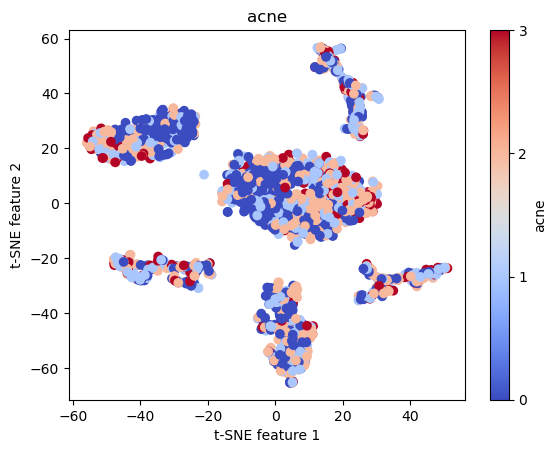

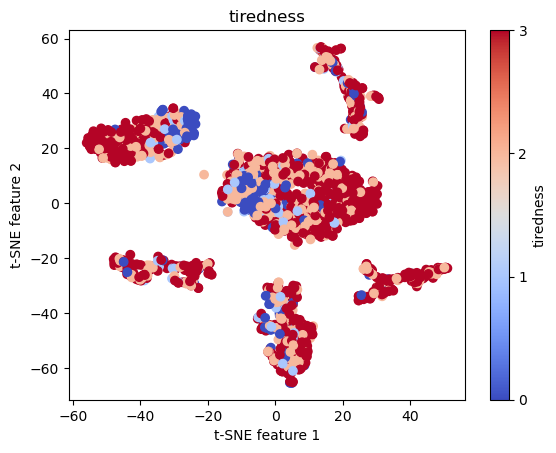

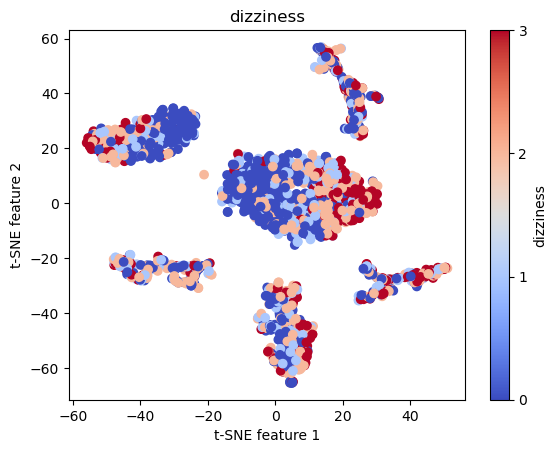

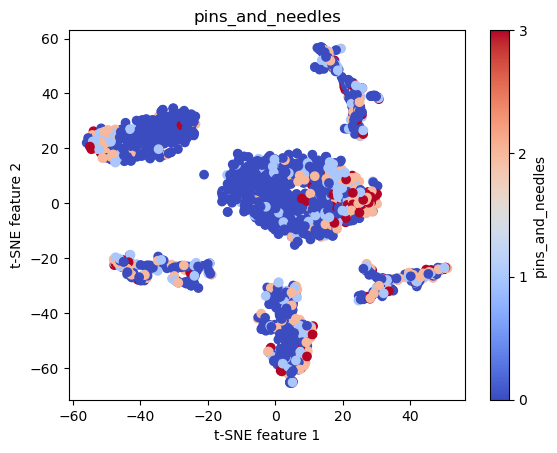

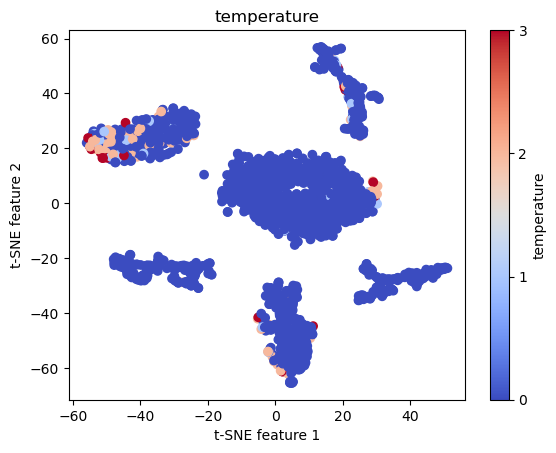

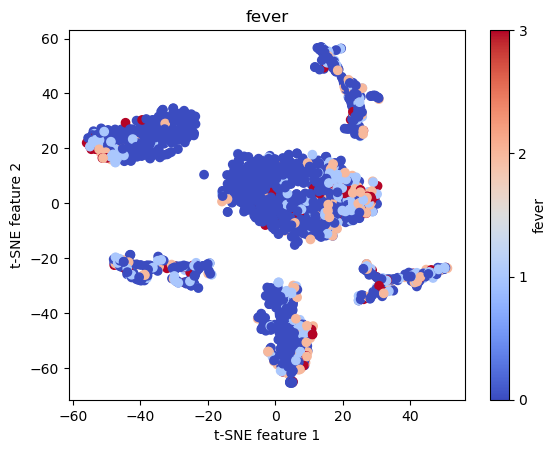

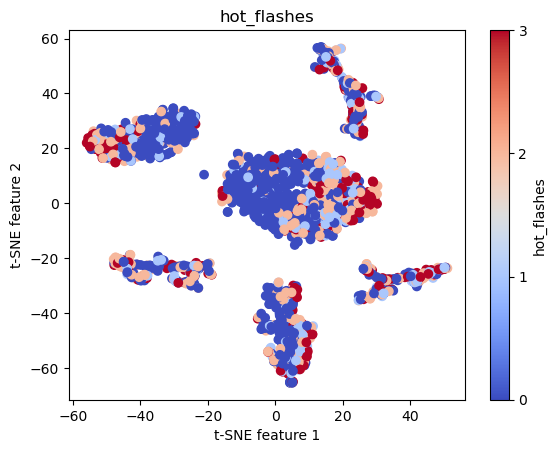

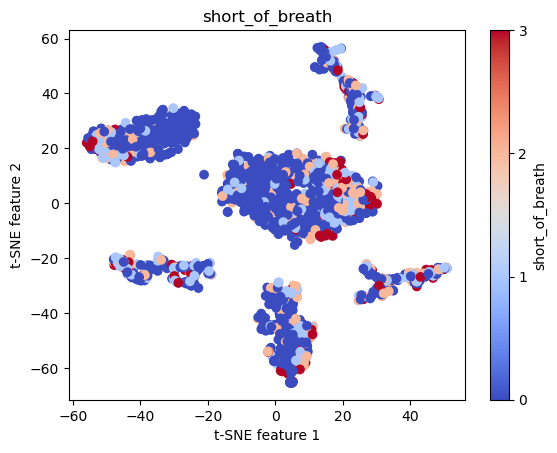

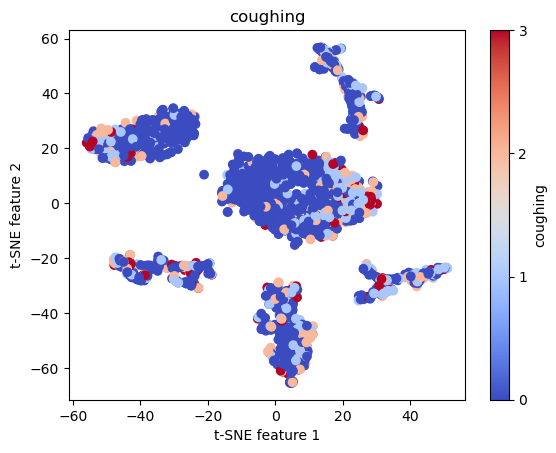

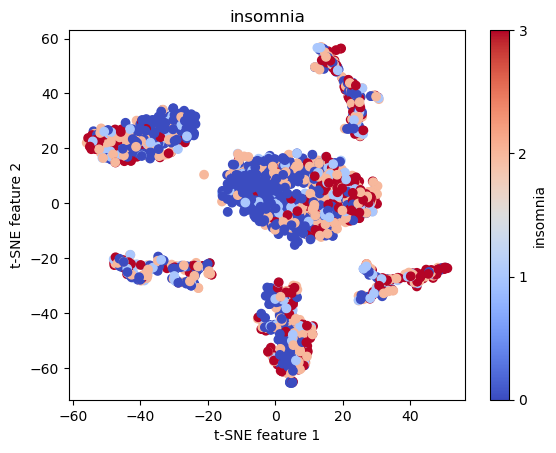

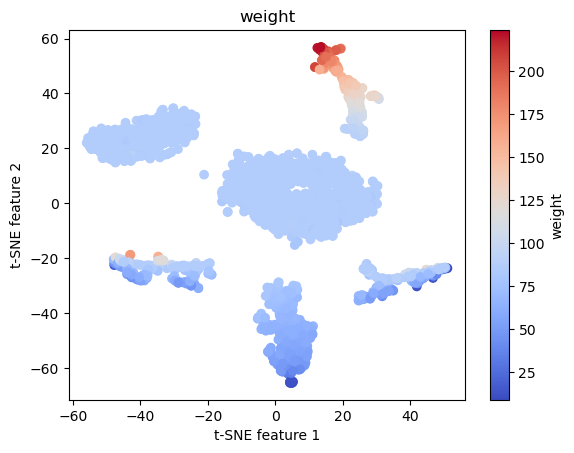

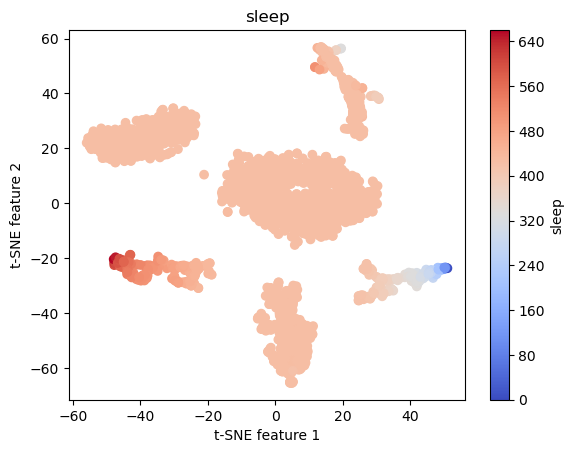

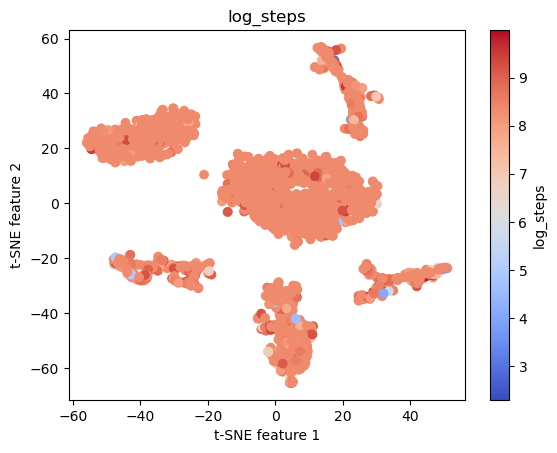

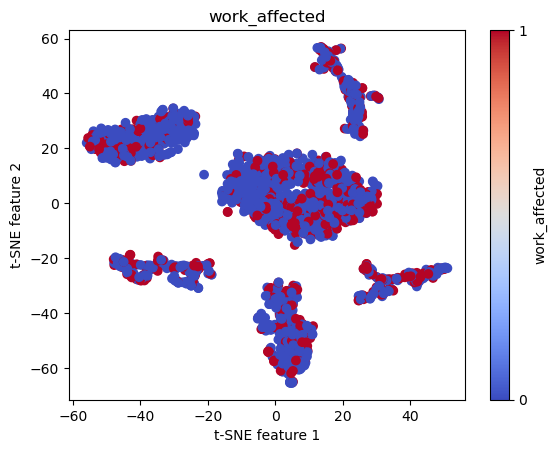

In [15]:
# Colour coded plot the 2D representation 
# Iterate over variables of interest

variables = ['pain_level', 'period_intensity', 'backaches', 'bodyaches', 'stomach_cramps', 'joint_pains', 'tender_breasts', 
            'overall_pain','headache', 'indigestion', 'bloating', 'constipation', 'diarrhea', 'nausea', 'vomiting', 
            'appetite_loss', 'cravings_salty', 'cravings_sweet', 'skin_changes', 'acne', 'tiredness', 'dizziness', 
            'pins_and_needles', 'temperature', 'fever', 'hot_flashes', 'short_of_breath', 'coughing', 'insomnia',
             'weight', 'sleep', 'log_steps', 'work_affected']

for var in variables:
    variable = df[var]
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=variable, cmap='coolwarm')
    cbar = plt.colorbar(scatter, label=f'{var}')
    cbar.locator = ticker.MaxNLocator(integer=True)
    cbar.update_ticks()
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.title(f'{var}')
    plt.savefig(f'fig/tSNE_{var}.png', dpi=300)  
    plt.show()

In [19]:
# Read in cluster labels from GLRM & K-means clustering
file_path = 'data/cluster_labels.csv'
cluster_labels = pd.read_csv(file_path)
# Add 1 to each cluster number to rename clusters 1-4 for scale
cluster_labels['predict'] = cluster_labels['predict'] + 1
print(cluster_labels.shape)
cluster_labels['predict'].value_counts()

(1918, 1)


predict
2    781
3    531
4    359
1    247
Name: count, dtype: int64

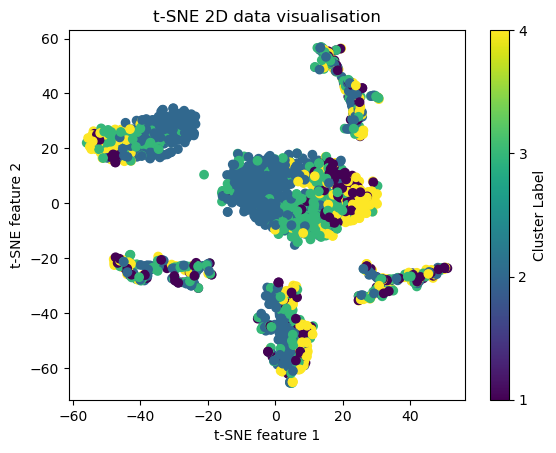

In [23]:
# Plot the 2D representation - filtered data
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster_labels['predict'], cmap='viridis')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('t-SNE 2D data visualisation')
cbar = plt.colorbar(label='Cluster Label')
cbar.locator = ticker.MaxNLocator(integer=True)
cbar.update_ticks()
plt.savefig('fig/tSNE_2D_clustered_data.png', dpi=300)  
plt.show()